# Key Performance Indicators

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import zscore
from collections import defaultdict


In [16]:
df_ev = pd.read_csv("data/cleaned_chargingdata.csv")
df_weather = pd.read_csv("data/cleaned_weatherdata.csv")

In [17]:
df_ev.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
chargingDuration    float64
dtype: object

In [56]:
df_ev['id'] = df_ev['id'].astype('string')

df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'], errors='coerce', utc=True)  
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'], errors='coerce', utc=True)  
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'], errors='coerce', utc=True) 

df_ev['connectionTime'] = df_ev['connectionTime'].dt.tz_convert('America/Los_Angeles')
df_ev['disconnectTime'] = df_ev['disconnectTime'].dt.tz_convert('America/Los_Angeles')
df_ev['doneChargingTime'] = df_ev['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

# df_ev['connectionTime'] = df_ev['connectionTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
# df_ev['disconnectTime'] = df_ev['disconnectTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)
# df_ev['doneChargingTime'] = df_ev['doneChargingTime'].str.replace(r'(-08:00)|(-07:00)', '', regex=True)

# df_ev['sessionID'] = df_ev['sessionID'].astype('string')
df_ev['siteID'] = df_ev['siteID'].astype('string')
# df_ev['spaceID'] = df_ev['spaceID'].astype('string')
# df_ev['stationID'] = df_ev['stationID'].astype('string')
# df_ev['timezone'] = df_ev['timezone'].astype('string')
# df_ev['userID'] = df_ev['userID'].astype('string')

In [19]:
df_ev.dtypes

Unnamed: 0.1                                      int64
Unnamed: 0                                        int64
id                                       string[python]
connectionTime      datetime64[ns, America/Los_Angeles]
disconnectTime      datetime64[ns, America/Los_Angeles]
doneChargingTime    datetime64[ns, America/Los_Angeles]
kWhDelivered                                    float64
sessionID                                        object
siteID                                            int64
spaceID                                          object
stationID                                        object
timezone                                         object
userID                                          float64
chargingDuration                                float64
dtype: object

In [11]:
df_ev

,Unnamed: 0.1,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,chargingDuration
0,0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,262.683333
1,1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,401.250000
2,2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,158.516667
3,3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,78.783333
4,4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,257.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64987,65032,8670,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 14:49:12-07:00,2019-07-01 18:37:18-07:00,2019-07-01 16:14:33-07:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,85.350000
64988,65033,8671,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 14:58:45-07:00,2019-07-01 17:39:48-07:00,2019-07-01 17:39:48-07:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,161.050000
64989,65034,8672,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 15:02:21-07:00,2019-07-01 17:58:50-07:00,2019-07-01 17:58:50-07:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,176.483333
64990,65035,8673,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 15:23:44-07:00,2019-07-01 19:03:36-07:00,2019-07-01 19:03:36-07:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,219.866667


In [20]:
site1 = df_ev[df_ev.siteID == 1]
site1.spaceID.unique()

array(['AG-3F30', 'AG-1F01', 'AG-1F03', 'AG-1F04', 'AG-1F06', 'AG-1F13',
       'AG-1F09', 'AG-4F34', 'AG-1F11', 'AG-1F08', 'AG-3F22', 'AG-1F14',
       'AG-1F07', 'AG-1F12', 'AG-3F29', 'AG-1F05', 'AG-3F18', 'AG-1F10',
       'AG-3F16', 'AG-4F37', 'AG-1F02', 'AG-3F28', 'AG-3F25', 'AG-3F24',
       'AG-3F33', 'AG-3F23', 'AG-3F31', 'AG-3F32', 'AG-3F27', 'AG-3F26',
       'AG-3F20', 'AG-3F17', 'AG-3F21', 'AG-3F19', 'AG-4F44', 'AG-4F52',
       'AG-4F41', 'AG-4F48', 'AG-4F35', 'AG-4F50', 'AG-3F15', 'AG-4F51',
       'AG-4F47', 'AG-4F46', 'AG-4F49', 'AG-4F43', 'AG-4F42', 'AG-4F45',
       'AG-4F36', 'AG-4F38', 'AG-4F40', 'AG-4F39'], dtype=object)

In [21]:
site2 = df_ev[df_ev.siteID == 2]
site2.spaceID.unique()

array(['CA-512', 'CA-327', 'CA-326', 'CA-303', 'CA-325', 'CA-311',
       'CA-309', 'CA-491', 'CA-493', 'CA-499', 'CA-323', 'CA-313',
       'CA-324', 'CA-513', 'CA-305', 'CA-317', 'CA-510', 'CA-315',
       'CA-321', 'CA-490', 'CA-497', 'CA-489', 'CA-319', 'CA-492',
       'CA-494', 'CA-502', 'CA-500', 'CA-495', 'CA-498', 'CA-304',
       'CA-307', 'CA-306', 'CA-501', 'CA-318', 'CA-308', 'CA-316',
       'CA-312', 'CA-320', 'CA-212', 'CA-508', 'CA-322', 'CA-314',
       'CA-503', 'CA-504', 'CA-496', 'CA-310', 'CA-506', 'CA-149',
       'CA-509', 'CA-507', 'CA-511', 'CA-213', 'CA-505', 'CA-148',
       '11900388'], dtype=object)

## 1. Hourly Utilization Rate

In [ ]:
# Define the total number of spaces per site (example values)
total_spaces = {
    1: 52,  # Replace with the actual number of spaces for site 1
    2: 54   # Replace with the actual number of spaces for site 2
}

# Create a new df_evFrame to hold hourly df_ev
start_time = df_ev['connectionTime'].min().replace(minute=0, second=0, microsecond=0)
end_time = df_ev['disconnectTime'].max().replace(minute=0, second=0, microsecond=0) + timedelta(hours=1)

# Generate hourly intervals
times = pd.date_range(start=start_time, end=end_time, freq='H')
hourly_df_ev = []

for time in times:
    # For each hour, calculate utilization for each site
    hourly_entry = {'hour': time}
    for site in total_spaces.keys():
        # Filter sessions active during the hour for the site
        active_sessions = df_ev[(df_ev['siteID'] == site) &
                             (df_ev['connectionTime'] <= time + timedelta(hours=1)) &
                             (df_ev['disconnectTime'] > time)]

        # Calculate utilization rate
        utilization = len(active_sessions['spaceID'].unique()) / total_spaces[site]
        hourly_entry[f'utilization_{site}'] = utilization

    hourly_df_ev.append(hourly_entry)

# Create df_evFrame for hourly utilization
hourly_df = pd.df_evFrame(hourly_df_ev)

# Display the result
hourly_df.head()

,hour,utilization_1,utilization_2
0,2018-04-25 04:00:00-07:00,0.0,0.018519
1,2018-04-25 05:00:00-07:00,0.0,0.018519
2,2018-04-25 06:00:00-07:00,0.0,0.055556
3,2018-04-25 07:00:00-07:00,0.0,0.129630
4,2018-04-25 08:00:00-07:00,0.0,0.407407


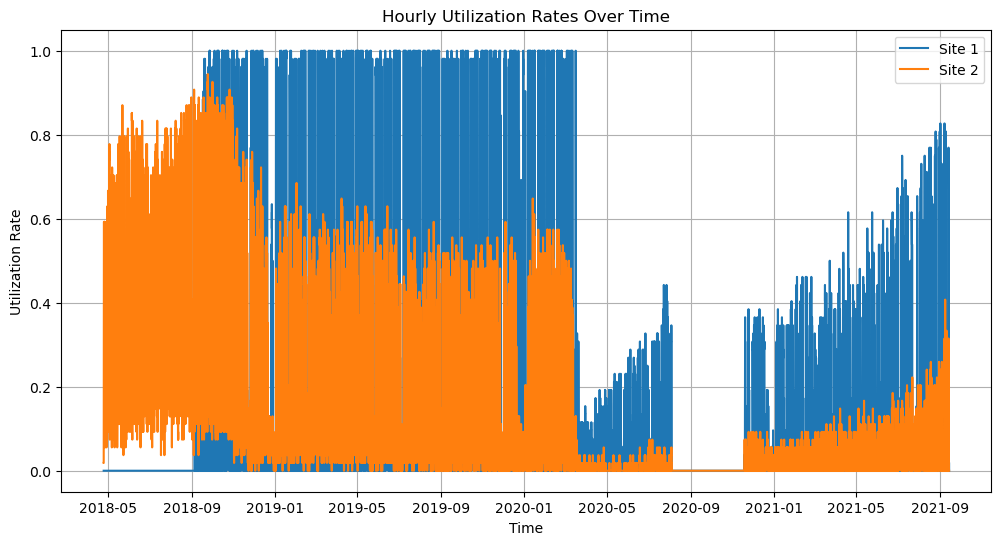

In [24]:
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(hourly_df['hour'], hourly_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

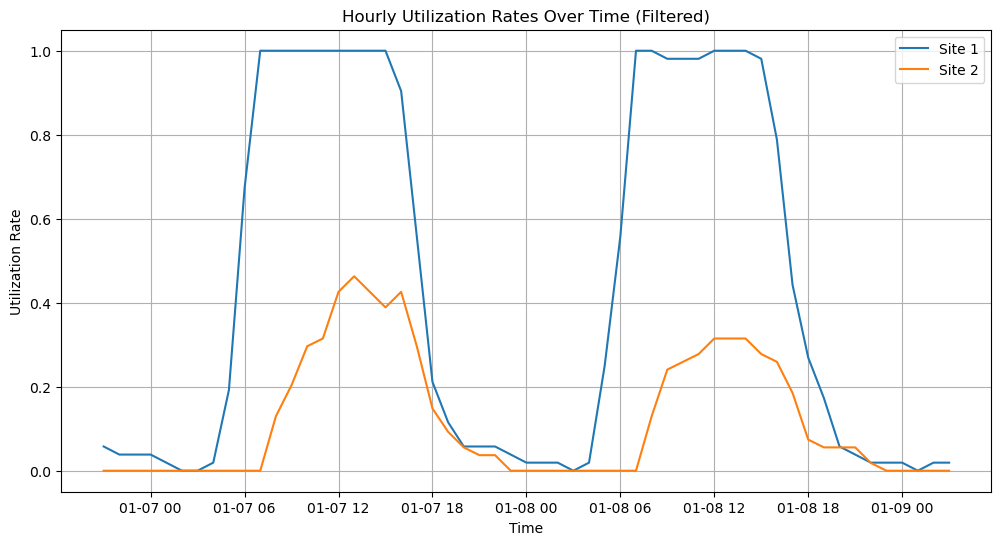

In [30]:

# Filter the timeframe
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 6, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 9, 12, 0).astimezone(timezone)  # Example end time
filtered_df = hourly_df[(hourly_df['hour'] >= filtered_start_time) & (hourly_df['hour'] <= filtered_end_time)]

# Visualization
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

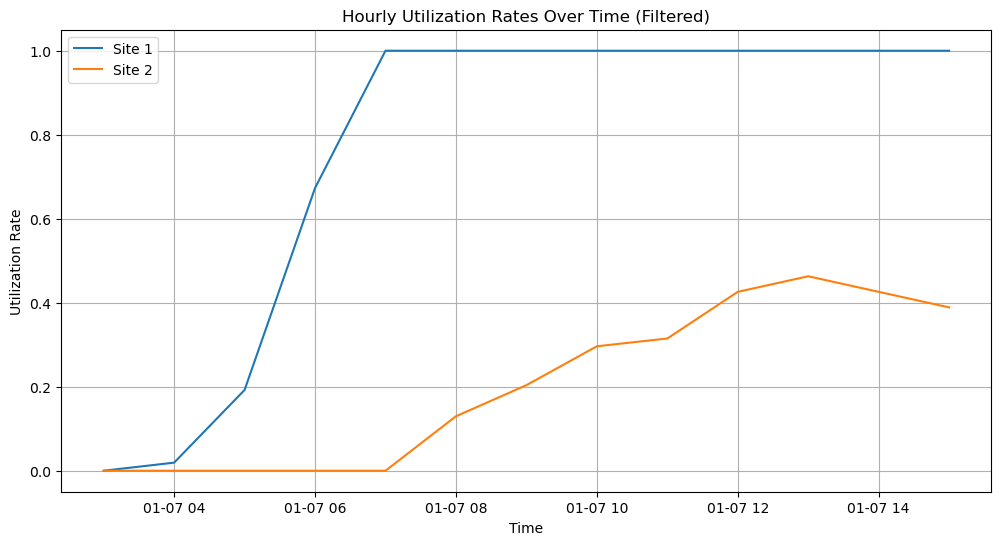

In [40]:
timezone = pytz.timezone('America/Los_Angeles')
filtered_start_time = datetime(2020, 1, 7, 12, 0).astimezone(timezone)  # Example start time
filtered_end_time = datetime(2020, 1, 8, 0, 0).astimezone(timezone)  # Example end time
filtered_df = hourly_df[(hourly_df['hour'] >= filtered_start_time) & (hourly_df['hour'] <= filtered_end_time)]

# Visualization
plt.figure(figsize=(12, 6))
for site in total_spaces.keys():
    plt.plot(filtered_df['hour'], filtered_df[f'utilization_{site}'], label=f'Site {site}')

plt.title('Hourly Utilization Rates Over Time (Filtered)')
plt.xlabel('Time')
plt.ylabel('Utilization Rate')
plt.legend()
plt.grid()
plt.show()

# 2 Avergae Hourly Session Duration

In [46]:
df_ev['session_duration'] = (df_ev['disconnectTime'] - df_ev['connectionTime']).dt.total_seconds() / 60.0

average_duration = df_ev['session_duration'].mean()

print(f"Average Duration of Charging Sessions: {average_duration:.2f} minutes")

Average Duration of Charging Sessions: 374.96 minutes


In [57]:
def calculate_average_session_duration(site_id, df_ev):
    """
    Calculate the average session duration for a given charging site.

    Parameters:
        site_id (int or str): The ID of the charging site to analyze.
        data (pd.DataFrame): DataFrame containing charging session data with columns:
            - 'siteID': Site ID
            - 'connectionTime': Start time of the charging session (datetime)
            - 'disconnectTime': End time of the charging session (datetime)

    Returns:
        float: The average session duration for the given site in minutes.
    """
    site_id = str(site_id)  # Convert site_id to string
    # Filter data for the given siteID
    site_data = df_ev[df_ev['siteID'] == site_id].copy()

    # Ensure datetime columns are in datetime format
    site_data['connectionTime'] = pd.to_datetime(site_data['connectionTime'])
    site_data['disconnectTime'] = pd.to_datetime(site_data['disconnectTime'])

    # Calculate session duration (difference between disconnectTime and connectionTime)
    site_data['sessionDuration'] = (site_data['disconnectTime'] - site_data['connectionTime']).dt.total_seconds() / 60  # in minutes

    # Calculate the average session duration
    avg_session_duration = site_data['sessionDuration'].mean()

    return avg_session_duration

# Example usage:
avg_duration_site1 = calculate_average_session_duration(1, df_ev)
avg_duration_site2 = calculate_average_session_duration(2, df_ev)

print(f"Average session duration for Site 1: {avg_duration_site1:.2f} minutes")
print(f"Average session duration for Site 2: {avg_duration_site2:.2f} minutes")

Average session duration for Site 1: 410.67 minutes
Average session duration for Site 2: 336.69 minutes


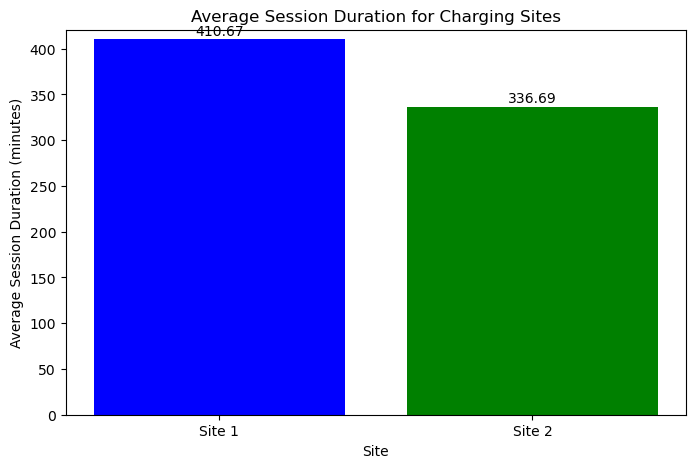

In [58]:
def plot_avg_session_duration(avg_durations, sites):
    """
    Plots the average session duration for different sites.

    Parameters:
        avg_durations (list): A list containing average session durations for each site.
        sites (list): A list of site names corresponding to the durations in avg_durations.
    """
    # Handle NaN values by replacing them with 0
    avg_durations = [0 if pd.isna(duration) else duration for duration in avg_durations]

    plt.figure(figsize=(8, 5))
    plt.bar(sites, avg_durations, color=['blue', 'green'])

    # Adding labels and title
    plt.xlabel('Site')
    plt.ylabel('Average Session Duration (minutes)')
    plt.title('Average Session Duration for Charging Sites')
    plt.ylim(0, max(avg_durations) + 10)  # Add some padding to the top of the bars

    # Display the value on top of each bar
    for i, v in enumerate(avg_durations):
        plt.text(i, v + 1, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

    # Show the plot
    plt.show()

# Calculate the average session duration for both sites
avg_duration_site1 = calculate_average_session_duration(1, df_ev)
avg_duration_site2 = calculate_average_session_duration(2, df_ev)

# Prepare the data for plotting
avg_durations = [avg_duration_site1, avg_duration_site2]
sites = ['Site 1', 'Site 2']

# Call the plotting function
plot_avg_session_duration(avg_durations, sites)

In [60]:

# Function to calculate the average hourly session duration for a given charging site
def calculate_avg_hourly_session_duration(site_id, df_ev):
    """
    Calculate the average hourly session duration for a given charging site.

    Parameters:
        site_id (int): ID of the site to analyze.
        data (pd.DataFrame): DataFrame containing charging session data with columns:
            - 'siteID': Site ID
            - 'stationID': Charging station ID
            - 'connectionTime': Start time of charging session (datetime)
            - 'disconnectTime': End time of charging session (datetime)

    Returns:
        pd.DataFrame: A DataFrame with average session durations for each hour.
    """
    site_id = str(site_id)  # Convert site_id to string
    # Filter data for the given site
    site_data = df_ev[df_ev['siteID'] == site_id].copy()

    # Debugging: Check if we have any data for the specified site_id
    print(f"Number of rows for siteID {site_id}: {len(site_data)}")

    if len(site_data) == 0:
        print(f"No data found for siteID {site_id}. Please check your data.")
        return pd.DataFrame()  # Return an empty DataFrame if no data for siteID

    # Ensure datetime columns are in proper datetime format
    site_data['connectionTime'] = pd.to_datetime(site_data['connectionTime'], errors='coerce')
    site_data['disconnectTime'] = pd.to_datetime(site_data['disconnectTime'], errors='coerce')

    # Check if the datetime conversion is successful
    print(f"First few rows of data for siteID {site_id}:")
    print(site_data[['connectionTime', 'disconnectTime']].head())

    # Calculate session duration in minutes
    site_data['sessionDuration'] = (site_data['disconnectTime'] - site_data['connectionTime']).dt.total_seconds() / 60  # in minutes

    # Extract the hour of the day from the connection time
    site_data['connectionHour'] = site_data['connectionTime'].dt.hour

    # Check the data after calculation
    print(f"Data after calculating session durations for siteID {site_id}:")
    print(site_data[['connectionHour', 'sessionDuration']].head())

    # Calculate the average session duration per hour
    avg_hourly_duration = site_data.groupby('connectionHour')['sessionDuration'].mean().reset_index()

    # Debugging: Check if we got any valid average hourly duration
    print(f"Average hourly session duration for siteID {site_id}:")
    print(avg_hourly_duration)

    return avg_hourly_duration


# Calculate the average hourly session duration for Site 1
avg_hourly_duration_site1 = calculate_avg_hourly_session_duration(1, df_ev)

# Calculate the average hourly session duration for Site 2
avg_hourly_duration_site2 = calculate_avg_hourly_session_duration(2, df_ev)

# Plot the average hourly session duration for both sites
#plot_avg_hourly_session_duration(avg_hourly_duration_site1, avg_hourly_duration_site2)

Number of rows for siteID 1: 33620
First few rows of data for siteID 1:
             connectionTime            disconnectTime
0 2020-01-02 05:08:54-08:00 2020-01-02 11:11:15-08:00
1 2020-01-02 05:36:50-08:00 2020-01-02 14:38:21-08:00
2 2020-01-02 05:56:35-08:00 2020-01-02 16:39:22-08:00
3 2020-01-02 05:59:58-08:00 2020-01-02 08:38:39-08:00
4 2020-01-02 06:00:01-08:00 2020-01-02 14:08:40-08:00
Data after calculating session durations for siteID 1:
   connectionHour  sessionDuration
0               5       362.350000
1               5       541.516667
2               5       642.783333
3               5       158.683333
4               6       488.650000
Average hourly session duration for siteID 1:
    connectionHour  sessionDuration
0                0       328.801333
1                1       372.240278
2                2       281.129048
3                3       331.281848
4                4       516.722436
5                5       537.232487
6                6       518.410261
7    

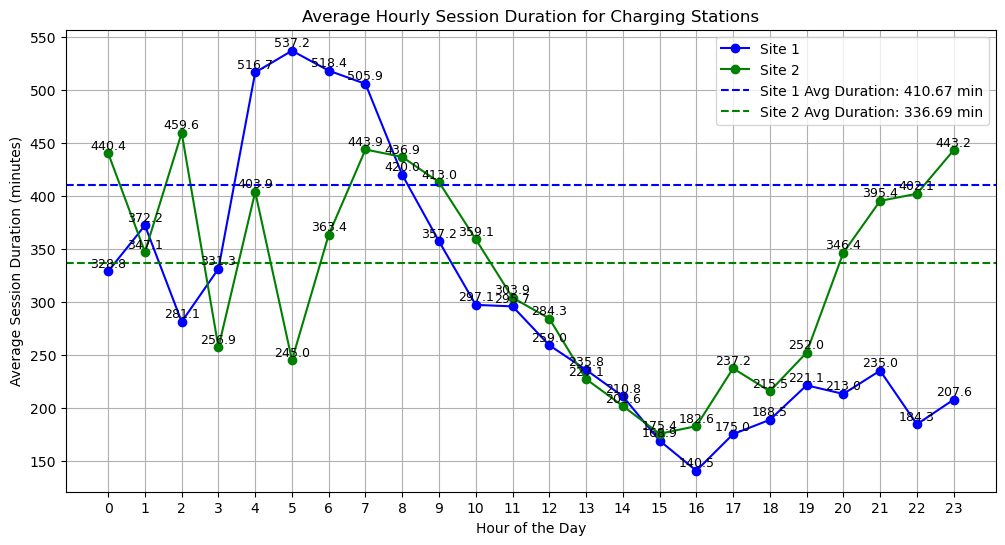

In [61]:
def plot_avg_hourly_session_duration(avg_hourly_duration_1, avg_hourly_duration_2, avg_duration_site1, avg_duration_site2):
    """
    Plots the average hourly session duration for two sites with absolute average durations as horizontal lines.

    Parameters:
        avg_hourly_duration_1 (pd.df_evFrame): df_evFrame with average session durations for Site 1.
        avg_hourly_duration_2 (pd.df_evFrame): df_evFrame with average session durations for Site 2.
        avg_duration_site1 (float): Absolute average session duration for Site 1.
        avg_duration_site2 (float): Absolute average session duration for Site 2.
    """
    plt.figure(figsize=(12, 6))

    if not avg_hourly_duration_1.empty:
        # Plot the hourly session durations for Site 1
        plt.plot(avg_hourly_duration_1['connectionHour'], avg_hourly_duration_1['sessionDuration'], marker='o', label='Site 1', color='blue')

    if not avg_hourly_duration_2.empty:
        # Plot the hourly session durations for Site 2
        plt.plot(avg_hourly_duration_2['connectionHour'], avg_hourly_duration_2['sessionDuration'], marker='o', label='Site 2', color='green')

    # Add absolute average horizontal line for Site 1
    if not avg_hourly_duration_1.empty:
        plt.axhline(avg_duration_site1, color='blue', linestyle='--', label=f'Site 1 Avg Duration: {avg_duration_site1:.2f} min')

    # Add absolute average horizontal line for Site 2
    if not avg_hourly_duration_2.empty:
        plt.axhline(avg_duration_site2, color='green', linestyle='--', label=f'Site 2 Avg Duration: {avg_duration_site2:.2f} min')

    # Title and labels
    plt.title('Average Hourly Session Duration for Charging Stations')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Session Duration (minutes)')

    # Set X-axis to display each hour from 0 to 23
    plt.xticks(range(24))

    # Add value labels above each point for clarity
    for i, row in avg_hourly_duration_1.iterrows():
        plt.text(row['connectionHour'], row['sessionDuration'] + 1, f'{row["sessionDuration"]:.1f}', ha='center', va='bottom', fontsize=9)

    for i, row in avg_hourly_duration_2.iterrows():
        plt.text(row['connectionHour'], row['sessionDuration'] + 1, f'{row["sessionDuration"]:.1f}', ha='center', va='bottom', fontsize=9)

    # Grid and legend
    plt.grid()
    plt.legend()

    # Show the plot
    plt.show()

# Example usage:
# Assuming avg_hourly_duration_site1 and avg_hourly_duration_site2 have been calculated already

# Plot the average hourly session duration for both sites and add the absolute averages
plot_avg_hourly_session_duration(
    avg_hourly_duration_site1, 
    avg_hourly_duration_site2, 
    avg_duration_site1, 
    avg_duration_site2
)

# 3. Energy Delivered per Hour

In [62]:
def calculate_energy_delivered_per_hour(site_id, df_ev):
    """
    Calculate the energy delivered per hour for a given site.

    Parameters:
        site_id (int): The ID of the charging site.
        data (pd.DataFrame): The DataFrame containing charging session data with columns:
            - 'siteID': Site ID
            - 'stationID': Charging station ID
            - 'connectionTime': Start time of charging session (datetime)
            - 'disconnectTime': End time of charging session (datetime)
            - 'kWhDelivered': Energy delivered during the session (kWh)

    Returns:
        pd.DataFrame: DataFrame with energy delivered per hour.
            - 'hour': Hour of the day (0-23)
            - 'energy_delivered': Total energy delivered (kWh) during that hour
    """

    site_id = str(site_id)  # Convert site_id to string
    # Filter data for the given site
    site_data = df_ev[df_ev['siteID'] == site_id].copy()

    # Generate hourly data from charging sessions
    hourly_data = []

    for _, row in site_data.iterrows():
        start_time = row['connectionTime'].floor('H')  # Round connection time to the nearest full hour
        end_time = row['disconnectTime'].floor('H')    # Round disconnect time to the nearest full hour

        # Ensure the duration is non-zero
        if start_time != end_time and (end_time - start_time).total_seconds() > 0:
            current_time = start_time

            while current_time <= end_time:
                # Calculate energy delivered for this hour segment
                energy_per_hour = row['kWhDelivered'] / (end_time - start_time).total_seconds() * 3600  # Energy delivered per hour
                hourly_data.append({
                    'stationID': row['stationID'],
                    'connectionDate': current_time.date(),
                    'hour': current_time.hour,
                    'energy_delivered': energy_per_hour
                })
                current_time += pd.Timedelta(hours=1)

    # Create a DataFrame for hourly energy delivered
    hourly_energy_df = pd.DataFrame(hourly_data)

    # Remove duplicates (to avoid double-counting the same hour)
    hourly_energy_df = hourly_energy_df.drop_duplicates()

    # Aggregate energy delivered by hour
    hourly_energy = hourly_energy_df.groupby('hour')['energy_delivered'].sum().reset_index()

    return hourly_energy

In [65]:
# Calculate energy delivered per hour for Site 1
energy_delivered_site1 = calculate_energy_delivered_per_hour(1, df_ev)

# Calculate energy delivered per hour for Site 2
energy_delivered_site2 = calculate_energy_delivered_per_hour(2, df_ev)

# Show the results
print(energy_delivered_site1)
print(energy_delivered_site2)

    hour  energy_delivered
0      0        923.459214
1      1        544.090656
2      2        368.724651
3      3        575.561568
4      4       1225.407097
5      5       5219.964655
6      6      18202.405417
7      7      37121.274937
8      8      42544.087183
9      9      45610.773335
10    10      47155.044042
11    11      49388.517200
12    12      49539.728153
13    13      49081.420182
14    14      49615.212628
15    15      50549.380146
16    16      45906.601331
17    17      30403.047087
18    18      13908.981215
19    19       6985.812432
20    20       3632.130783
21    21       2218.955528
22    22       1696.062525
23    23       1305.409821
    hour  energy_delivered
0      0       3481.496601
1      1       2947.132462
2      2       2708.023829
3      3       2560.429870
4      4       2644.353813
5      5       3021.152473
6      6       5533.907373
7      7       8338.615862
8      8      15867.562609
9      9      22422.043743
10    10      26273.791642
1

In [66]:
# Function to plot energy delivered per hour for two sites
def plot_energy_delivered_per_hour(energy_site1, energy_site2):
    plt.figure(figsize=(12, 6))

    if not energy_site1.empty:
        # Plot the energy delivered per hour for Site 1
        plt.plot(energy_site1['hour'], energy_site1['energy_delivered'], marker='o', label='Energy Delivered Site 1', color='blue')

    if not energy_site2.empty:
        # Plot the energy delivered per hour for Site 2
        plt.plot(energy_site2['hour'], energy_site2['energy_delivered'], marker='o', label='Energy Delivered Site 2', color='green')

    # Title and labels
    plt.title('Energy Delivered per Hour for Charging Stations')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Energy Delivered (kWh)')

    # Set X-axis to display each hour from 0 to 23
    plt.xticks(range(24))

    # Add value labels above each point for clarity
    for i, row in energy_site1.iterrows():
        plt.text(row['hour'], row['energy_delivered'] + 0.1, f'{row["energy_delivered"]:.2f}', ha='center', va='bottom', fontsize=9)

    for i, row in energy_site2.iterrows():
        plt.text(row['hour'], row['energy_delivered'] + 0.1, f'{row["energy_delivered"]:.2f}', ha='center', va='bottom', fontsize=9)

    # Grid and legend
    plt.grid()
    plt.legend()

    # Show the plot
    plt.show()

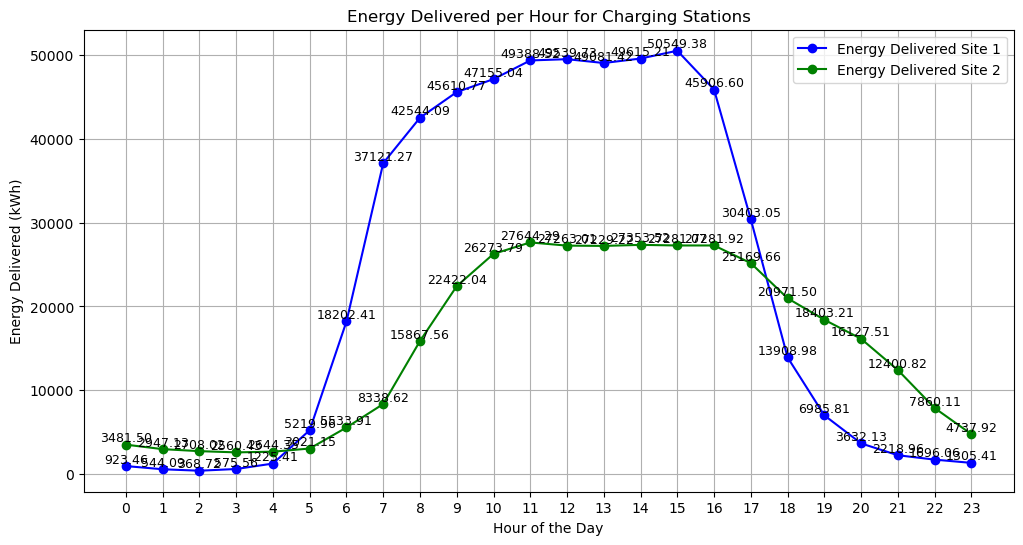

In [67]:
# Example usage:
plot_energy_delivered_per_hour(energy_delivered_site1, energy_delivered_site2)

In [69]:
# def calculate_hourly_energy(row):
#     energy_per_minute = row['kWhDelivered'] / row['chargingDurationMinutes']
#     hourly_energy = defaultdict(float)
#     hourly_ranges = pd.date_range(start=row['connectionTime'], end=row['doneChargingTime'], freq='H')
#     if row['doneChargingTime'] in hourly_ranges:
#         hourly_ranges = hourly_ranges[:-1]   
#     for hour in hourly_ranges:
#         hour_start = max(row['connectionTime'], hour)
#         hour_end = min(row['doneChargingTime'], hour + pd.Timedelta(hours=1))
#         duration_in_minutes = (hour_end - hour_start).total_seconds() / 60
#         hourly_energy[hour] += energy_per_minute * duration_in_minutes
#     return hourly_energy